In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
%env KAGGLE_USERNAME=yagli18
%env KAGGLE_KEY=##########################
!kaggle competitions download -c nicht-mnist

env: KAGGLE_USERNAME=yagli18
env: KAGGLE_KEY=9a0215d4b35e8d69061e6efa4eafa0d6
 89%|█████████████████████████████████▊    | 7.00M/7.85M [00:00<00:00, 71.4MB/s]
100%|██████████████████████████████████████| 7.85M/7.85M [00:00<00:00, 75.6MB/s]


In [3]:
!unzip ./nicht-mnist.zip

Archive:  ./nicht-mnist.zip
  inflating: Random_Sample_Submission.csv  
  inflating: test.csv                
  inflating: train.csv               


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf

In [5]:
train = pd.read_csv('./train.csv',header=None, index_col =0)
test = pd.read_csv('./test.csv',header=None, index_col =0)

In [6]:
train.head()

,1,2,3,4,5,6,7,8,9,10,...,776,777,778,779,780,781,782,783,784,785
0,,,,,,,,,,,,,,,,,,,,,
0,A,0,0,0,0,0,0,0,0,0,...,0,0,9,19,4,30,11,8,77,13
1,A,255,255,255,255,255,255,255,255,255,...,0,0,4,0,153,255,251,255,255,255
2,A,0,0,0,0,0,0,0,0,0,...,114,114,117,117,117,117,115,114,96,19
3,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,24,90,99,28
4,A,0,0,0,0,2,0,80,221,223,...,0,0,2,0,180,255,243,244,255,103


In [7]:
test.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,2,22,163,...,1,0,18,159,239,255,255,255,234,115
1,0,7,106,182,183,176,171,171,171,171,...,3,0,3,97,201,240,243,210,102,1
2,0,0,0,0,0,0,0,0,0,0,...,195,235,255,254,255,247,199,197,207,145
3,2,0,10,96,181,227,248,255,255,255,...,0,0,0,0,2,0,22,190,248,156
4,0,0,0,0,3,2,0,1,56,140,...,122,38,0,0,3,2,0,0,0,0


In [8]:
X=train.values[:, 1:].reshape((-1,28,28,1)) / 255.
X = np.asarray(X).astype(np.float32)
train_labels=train.iloc[:,0]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(train_labels)

X.shape, y.shape

((9360, 28, 28, 1), (9360,))

In [9]:
y

array([0, 0, 0, ..., 9, 9, 9])

<AxesSubplot:>

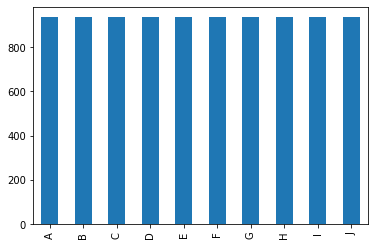

In [10]:
train_labels.value_counts().plot.bar()

## Training and Prediction

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, train_size=0.2, random_state=4)

In [12]:
model=tf.keras.Sequential([
                           tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)),
                           tf.keras.layers.BatchNormalization(),
                           tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
                           tf.keras.layers.MaxPool2D(2,2),
                           tf.keras.layers.BatchNormalization(),
                           tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
                           tf.keras.layers.MaxPool2D(2,2),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(100,activation="relu"),
                           tf.keras.layers.BatchNormalization(),
                           tf.keras.layers.Dense(10,activation="softmax")]) 
model.summary()

2022-08-29 15:47:00.427877: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-29 15:47:00.571363: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-29 15:47:00.572748: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-29 15:47:00.576379: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

ysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-29 15:47:02.906446: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-29 15:47:02.907058: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15401 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [13]:
model.compile(optimizer= 'Adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history=model.fit(x_train, y_train, validation_data=(x_test, y_test) ,epochs=20,verbose=1)

Epoch 1/20


2022-08-29 15:47:03.472541: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
/opt/conda/lib/python3.7/site-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '
2022-08-29 15:47:05.227651: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


59/59 [==============================] - 9s 22ms/step - loss: 0.8244 - accuracy: 0.7628 - val_loss: 2.2487 - val_accuracy: 0.2748
Epoch 2/20
59/59 [==============================] - 1s 11ms/step - loss: 0.3220 - accuracy: 0.9097 - val_loss: 2.8587 - val_accuracy: 0.1245
Epoch 3/20
59/59 [==============================] - 1s 10ms/step - loss: 0.1823 - accuracy: 0.9525 - val_loss: 2.6743 - val_accuracy: 0.0996
Epoch 4/20
59/59 [==============================] - 1s 10ms/step - loss: 0.1201 - accuracy: 0.9679 - val_loss: 3.3186 - val_accuracy: 0.0970
Epoch 5/20
59/59 [==============================] - 1s 11ms/step - loss: 0.0768 - accuracy: 0.9850 - val_loss: 3.6134 - val_accuracy: 0.0970
Epoch 6/20
59/59 [==============================] - 1s 11ms/step - loss: 0.0464 - accuracy: 0.9963 - val_loss: 2.2565 - val_accuracy: 0.2560
Epoch 7/20
59/59 [==============================] - 1s 11ms/step - loss: 0.0273 - accuracy: 0.9984 - val_loss: 1.4747 - val_accuracy: 0.4968
Epoch 8/20
59/59 [======

In [14]:
y_train.shape

(1872,)

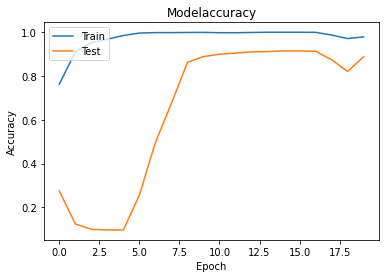

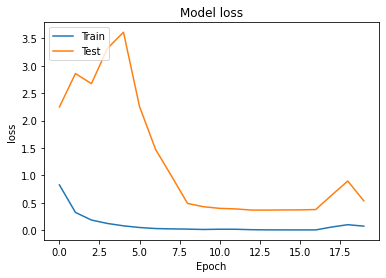

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Modelaccuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show()

## Submission

In [16]:
X_test_ = test.values.reshape((-1,28,28,1)) / 255.
X_test_ = np.asarray(X_test_).astype(np.float32)

In [17]:
pred = model.predict(X_test_)
pred = np.argmax(pred,axis = 1)
pred = le.inverse_transform(pred)
pred

array(['A', 'A', 'A', ..., 'D', 'J', 'J'], dtype=object)

In [18]:
submission = pd.read_csv('./Random_Sample_Submission.csv')
submission['target'] = pred
submission.to_csv('submission.csv', index=False)
submission.head()

,Id,target
0,0,A
1,1,A
2,2,A
3,3,G
4,4,B
